In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from tensorflow.keras.utils import to_categorical
import librosa
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from keras.callbacks import  EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from google.colab import drive
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
import noisereduce as nr
from tensorflow.keras import initializers
import tensorflow
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
from keras.models import load_model
import librosa
import librosa.display
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.regularizers import L2
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sub_dirs = os.listdir('/content/drive/MyDrive/Audios_Señales')
sub_dirs.sort()
for label, sub_dir in enumerate(sub_dirs):
  print(f"Extrayendo el subdirectorio:{sub_dir}")
  for file_name in glob.glob(os.path.join('/content/drive/MyDrive/Audios_Señales',sub_dir,'*.wav')):
    print(f"Extrayendo el archivo: {file_name}")

    x,Fs = librosa.load(file_name,mono=True,sr=16000)
    audio_trim = librosa.effects.trim(x,top_db=18)  #Eliminar silencios
    audio_reduce = nr.reduce_noise(y=audio_trim[0],sr=Fs)      #Reducir Ruidos
    audio_normalize = librosa.util.normalize(audio_reduce,norm=2)   #Normalizar la señal

    plt.specgram(audio_normalize,NFFT=512,Fs=Fs,Fc=0,noverlap=64,cmap=plt.cm.jet,scale='dB')
    plt.axis('off')
    plt.savefig(f'{file_name[:-3].replace(".","")}.png')
    plt.clf

In [ ]:
path_dir = '/content/drive/MyDrive/Audios_Señales'

# Crea un generador de imágenes
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Obtiene el generador para el conjunto de entrenamiento
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150, 150),
    shuffle=True,
    subset='training'
)

# Obtiene el generador para el conjunto de validación
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150, 150),
    subset='validation'
)

# Separa los datos en entrenamiento y prueba
num_samples = validation_generator.samples
num_train = int(num_samples * (1 - 0.2))
num_test = num_samples - num_train

# Obtiene los datos de entrenamiento
x_train, y_train = train_generator.next()
for i in range(num_train - 1):
    x, y = train_generator.next()
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))

# Obtiene los datos de prueba
x_test, y_test = validation_generator.next()
for i in range(num_test - 1):
    x, y = validation_generator.next()
    x_test = np.concatenate((x_test, x))
    y_test = np.concatenate((y_test, y))


Found 560 images belonging to 5 classes.
Found 137 images belonging to 5 classes.


In [ ]:
#aqui coloco el modelo diseñado a base del vgg16
model2 = Sequential()
model2.add(layers.Conv2D(16, (3,3), activation = 'relu', padding='same', input_shape = (150, 150, 3),
                       kernel_initializer = initializers.he_normal(),kernel_regularizer= L2(0.001)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Dropout(0.30))

model2.add(layers.Conv2D(32, (3,3), padding='same', activation = 'relu',
                       kernel_initializer = initializers.he_normal(),
                       kernel_regularizer= L2(0.001)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Dropout(0.30))

model2.add(layers.Conv2D(64, (3,3), padding='same', activation = 'relu',
                       kernel_initializer = initializers.he_normal(),
                       kernel_regularizer= L2(0.001)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Dropout(0.30))

model2.add(layers.Conv2D(128, (3,3), padding='same', activation = 'relu',
                       kernel_initializer = initializers.he_normal(),
                       kernel_regularizer= L2(0.001)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Dropout(0.30))

model2.add(layers.Conv2D(256, (3,3), padding='same', activation = 'relu',
                       kernel_initializer = initializers.he_normal(),
                       kernel_regularizer= L2(0.001)))
model2.add(layers.MaxPooling2D(2,2))
model2.add(layers.Dropout(0.30))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.35))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(5, activation = 'softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy',
                metrics=['accuracy'],optimizer='adam')
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0

In [ ]:
model2.save('modelito_prueba3.h5')

In [ ]:
model2.load_weights('modelito_prueba3.h5')

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience = 3,
    verbose = 1,
    min_delta=0.001,
    restore_best_weights=True #si cumple con el delta, escoger el mejor
    #si el monitor es loss el mode es min, por defecto es auto despues de verbose
)
history_modelCNN2= model2.fit(x_train,y_train,epochs=300, batch_size=200,validation_data=(x_test,y_test), verbose=1)
loss,acc = model2.evaluate(x_test, y_test, verbose=1)
print('Loss: {0}  -  Accuracy: {1}'.format(loss,acc))

Epoch 1/300
17/17 [==============================] - 3s 150ms/step - loss: 15.6735 - accuracy: 0.2067 - val_loss: 2.7723 - val_accuracy: 0.1959
Epoch 2/300
17/17 [==============================] - 2s 132ms/step - loss: 2.8099 - accuracy: 0.2067 - val_loss: 2.8242 - val_accuracy: 0.1959
Epoch 3/300
17/17 [==============================] - 2s 133ms/step - loss: 2.8180 - accuracy: 0.2146 - val_loss: 2.8083 - val_accuracy: 0.1959
Epoch 4/300
17/17 [==============================] - 2s 132ms/step - loss: 2.7860 - accuracy: 0.2305 - val_loss: 2.7735 - val_accuracy: 0.5314
Epoch 5/300
17/17 [==============================] - 2s 145ms/step - loss: 2.5846 - accuracy: 0.3744 - val_loss: 2.2797 - val_accuracy: 0.4968
Epoch 6/300
17/17 [==============================] - 2s 134ms/step - loss: 2.1925 - accuracy: 0.5483 - val_loss: 1.8977 - val_accuracy: 0.8182
Epoch 7/300
17/17 [==============================] - 2s 125ms/step - loss: 1.9039 - accuracy: 0.6651 - val_loss: 1.6781 - val_accuracy: 0.852

In [ ]:
model2.save('modelitoDEF.h5')

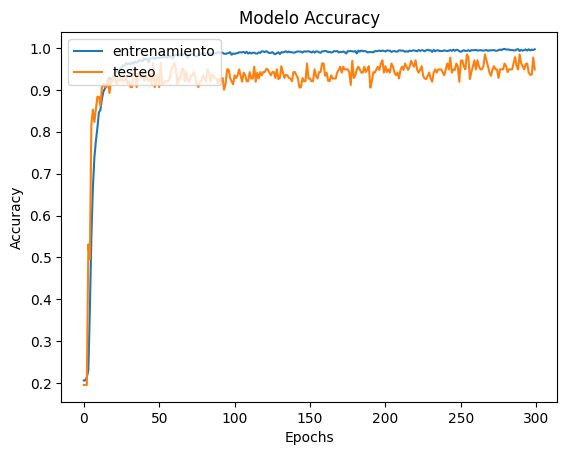

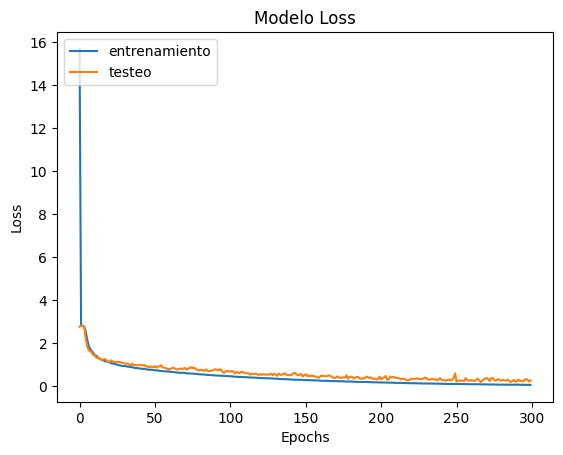

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_modelCNN2.history['accuracy'])
plt.plot(history_modelCNN2.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()
#Loss

plt.plot(history_modelCNN2.history['loss'])
plt.plot(history_modelCNN2.history['val_loss'])
plt.title('Modelo Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()

25/25 [==============================] - 0s 8ms/step


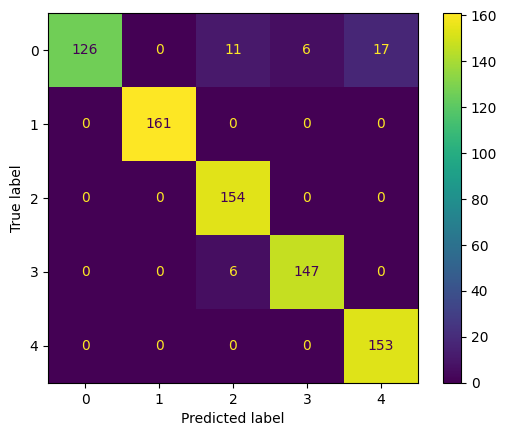

In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred = model2.predict(x_test)
result = confusion_matrix(y_test_labels, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(result)
disp.plot()
plt.show()

In [ ]:
# Obtener las probabilidades de las clases para el conjunto de prueba
y_prob = model2.predict(x_test)

# Obtener la clase con la mayor probabilidad para cada muestra
y_pred = y_prob.argmax(axis=-1)

# Obtener la clase real correspondiente a cada muestra
y_true = np.argmax(y_test, axis=-1)

# Imprimir el reporte de clasificación
target_names = ['Abajo', 'Arriba', 'Cambiar', 'Derecha', 'Izquierda']
print(classification_report(y_true, y_pred, target_names=target_names))

25/25 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       Abajo       1.00      0.79      0.88       160
      Arriba       1.00      1.00      1.00       161
     Cambiar       0.90      1.00      0.95       154
     Derecha       0.96      0.96      0.96       153
   Izquierda       0.90      1.00      0.95       153

    accuracy                           0.95       781
   macro avg       0.95      0.95      0.95       781
weighted avg       0.95      0.95      0.95       781



In [ ]:
RECORD = '''
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: {sampleSize: 16, channelCount: 1, sampleRate: 16000  }})
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
'''

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

modelo = load_model('/content/modelitoDEF.h5')


print(f"Hable máximo 2 segundos")
record(2,'audio.wav')

Hable máximo 2 segundos


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 145ms/step
La etiqueta predicha es: Abajo


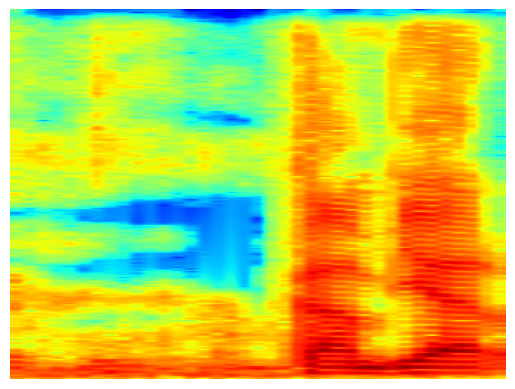

In [ ]:
# Cargar archivo de audio y preprocesar señal

x,sr = librosa.load('/content/drive/MyDrive/Audios_Señales/Cambiar(listo con 120 audios)/Cam10.wav',mono=True,sr=16000)
x, _ = librosa.effects.trim(x, top_db=18)
x = nr.reduce_noise(y=x, sr=sr)
x = librosa.util.normalize(x, norm=2)


plt.specgram(x, NFFT=512, Fs=sr, Fc=0, noverlap=64, cmap=plt.cm.jet, scale='dB')
plt.axis('off')
plt.savefig('imagen.png')
#plt.show('imagen.png')

# Cargar imagen del espectrograma generado
imagen_gris = cv2.imread('imagen.png', cv2.IMREAD_GRAYSCALE)

# Convertir imagen a RGB y normalizarla
imagen_rgb = cv2.cvtColor(imagen_gris, cv2.COLOR_GRAY2RGB)
imagen_normalizada = preprocess_input(imagen_rgb)

# Aplicar transformada de Fourier
fft = np.fft.fft2(imagen_rgb)
fft_desplazada = np.fft.fftshift(fft)


# Tomar logaritmo del espectro y redimensionar
log_espectro = np.log(np.abs(fft_desplazada) + 1)
log_espectro_red = cv2.resize(log_espectro, (150, 150))

# Cargar imagen y preprocesarla
#imagen_rgb = cv2.imread('imagen.png')
#print(imagen_rgb.shape)

# Redimensionar la imagen a la forma esperada por el modelo
#imagen_redimensionada = cv2.resize(imagen_rgb, (150, 150))
# Verificar la forma de la entrada que se está pasando al modelo
#print('Forma de la entrada:', imagen_redimensionada.shape)

#plt.show('log_espectro_red')

# Hacer predicción
modelo = load_model('/content/modelitoDEF.h5')
prediccion = modelo.predict(log_espectro_red[np.newaxis, ..., np.newaxis])
#print(prediccion)
etiquetas = ['Abajo', 'Arriba', 'Cambiar', 'Derecha', 'Izquierda']
etiqueta_predicha = etiquetas[np.argmax(prediccion)]

print('La etiqueta predicha es:', etiqueta_predicha)

1/1 [==============================] - 0s 98ms/step
audio.png


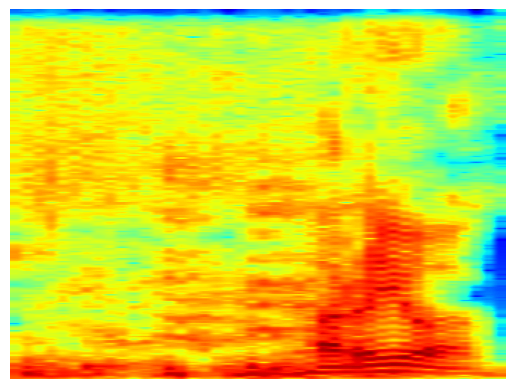

La etiqueta predicha es: Abajo


In [ ]:
x,Fs = librosa.load('/content/drive/MyDrive/Audios_Señales/Arriba(listo con 120 audios)/Arr20.wav',mono=True,sr=16000)
audio_trim = librosa.effects.trim(x,top_db=18)  #Eliminar silencios
audio_reduce = nr.reduce_noise(y=audio_trim[0],sr=Fs)      #Reducir Ruidos
audio_normalize = librosa.util.normalize(audio_reduce,norm=2)   #Normalizar la señal

plt.specgram(audio_normalize, NFFT=512, Fs=Fs, Fc=0, noverlap=64, cmap= plt.cm.jet, scale='dB')
plt.axis('off')
plt.savefig('audio.png')

# Cargar modelo entrenado
modelo = load_model('/content/modelitoDEF.h5')

# Definir etiquetas de clasificación
etiquetas = ['Abajo', 'Arriba', 'Cambiar', 'Derecha', 'Izquierda']


# Cargar imagen del espectrograma generado
imagen_gris = cv2.imread('audio.png', cv2.IMREAD_GRAYSCALE)

# Cargar imagen y preprocesarla
#imagen_rgb = cv2.imread('/content/audio.png')
# Convertir imagen a RGB y normalizarla
imagen_rgb = cv2.cvtColor(imagen_gris, cv2.COLOR_GRAY2RGB)
imagen_normalizada = preprocess_input(imagen_rgb)

# Aplicar transformada de Fourier
fft = np.fft.fft2(imagen_rgb)
fft_desplazada = np.fft.fftshift(fft)

# Tomar logaritmo del espectro y redimensionar
log_espectro = np.log(np.abs(fft_desplazada) + 1)
log_espectro_red = cv2.resize(log_espectro, (150, 150))

# Redimensionar la imagen a la forma esperada por el modelo
#imagen_redimensionada = cv2.resize(log_espectro_red, (150, 150))

prediccion = modelo.predict(log_espectro_red[np.newaxis, ..., np.newaxis])
etiqueta_predicha = etiquetas[np.argmax(prediccion)]


print('audio.png')
plt.show('log_espectro_red')
# Verificar la forma de la entrada que se está pasando al modelo
#print('Forma de la entrada:', imagen_redimensionada.shape)

# Hacer predicción

#prediccion = modelo.predict(imagen_redimensionada[np.newaxis, ...])
#print(prediccion)

#etiqueta_predicha = etiquetas[np.argmax(prediccion)]
print('La etiqueta predicha es:', etiqueta_predicha)